In [1]:
import pandas as pd
import subprocess
from tqdm import tqdm
import matplotlib.pyplot as plt



/tmp/ipykernel_323/4269568913.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
defense_sys=pd.read_table('./../Data/DefenseFinder_sys.tsv',sep='\t')
defense_sys

,replicon,sys_id,System,Subsystem,start,end,Length,start_prot,end_prot
0,GCF_001871795.1_NZ_MNXI01000096.1,GCF_001871795.1_CAS_Class1-Subtype-I-A_10,Cas,CAS_Class1-Subtype-I-A,595,10321,9727,884,893
1,GCF_002779175.1_NZ_PEXG01000227.1,GCF_002779175.1_CAS_Class1-Subtype-I-A_11,Cas,CAS_Class1-Subtype-I-A,132,9858,9727,2057,2066
2,GCF_002784845.1_NZ_PFKS01000175.1,GCF_002784845.1_CAS_Class1-Subtype-I-A_8,Cas,CAS_Class1-Subtype-I-A,879,6602,5724,2030,2033
3,GCF_002791875.1_NZ_PFNG01000135.1,GCF_002791875.1_CAS_Class1-Subtype-I-A_11,Cas,CAS_Class1-Subtype-I-A,119,9822,9704,599,607
4,GCF_014647835.1_NZ_BMPY01000022.1,GCF_014647835.1_CAS_Class1-Subtype-I-B_7,Cas,CAS_Class1-Subtype-I-B,118,6341,6224,2870,2874
...,...,...,...,...,...,...,...,...,...
170509,GCF_001279545.1_NZ_LGDZ01000194.1,GCF_001279545.1_RM_Type_IV_4,RM,RM_Type_IV,87664,89722,2059,3570,3570
170510,GCF_001279545.1_NZ_LGDZ01000096.1,GCF_001279545.1_RM_Type_IV_5,RM,RM_Type_IV,113711,116014,2304,5162,5163
170511,GCF_001279605.1_NZ_LGEF01000127.1,GCF_001279605.1_RM_Type_IV_11,RM,RM_Type_IV,25986,27801,1816,2582,2582
170512,GCF_001279615.1_NZ_LGEH01000216.1,GCF_001279615.1_RM_Type_IV_5,RM,RM_Type_IV,131178,132993,1816,1882,1882


In [3]:
cluster=pd.read_table('./../Data/Cluster_all_info.tsv',sep='\t')
cluster.loc[cluster.New_clade.isna(),'New_clade']=cluster.loc[cluster.New_clade.isna(),'Type']
cluster.loc[cluster.New_clade=='lanthipeptide-class-i','New_clade']='Non Defensive'
cluster['Type_defensive']=cluster.Type
cluster.loc[cluster.New_clade.isin(['Limit','Other','Clade 1','Clade 2','Clade 3','Clade 4','Clade 5','Clade 6',
                                   'Clade 7','Clade 8','Clade 9','Clade 10']),'Type_defensive']='Lanthiphage'
cluster

,Accession_DB,Localisation,start,end,Nuccore,Close_prophage,Cluster,Type,sys_id,Position,replicon,Assembly,New_clade,Type_defensive
0,GCF_000381025.1_NZ_KB905816.1_05659,540146:541352,540146,541352,NZ_KB905816.1,0,GCF_000381025.1_NZ_KB905816.1_05659,lanthipeptide-class-i,GCF_000381025.1_NZ_KB905816.1.region002_lanthi...,5659,GCF_000381025.1_NZ_KB905816.1,GCF_000381025.1,Clade 1,Lanthiphage
1,GCF_000381025.1_NZ_KB905816.1_05680,563090:564350,563090,564350,NZ_KB905816.1,0,GCF_000381025.1_NZ_KB905816.1_05680,lanthipeptide-class-i,GCF_000381025.1_NZ_KB905816.1.region002_lanthi...,5680,GCF_000381025.1_NZ_KB905816.1,GCF_000381025.1,Non Defensive,lanthipeptide-class-i
2,GCF_000715845.1_NZ_JNYL01000459.1_00039,5426:6662,5426,6662,NZ_JNYL01000459.1,0,GCF_000719735.1_NZ_JOHQ01000027.1_06446,lanthipeptide-class-i,GCF_000715845.1_NZ_JNYL01000459.1.region001_la...,39,GCF_000715845.1_NZ_JNYL01000459.1,GCF_000715845.1,Clade 5,Lanthiphage
3,GCF_000715845.1_NZ_JNYL01000459.1_00042,9283:10615,9283,10615,NZ_JNYL01000459.1,0,GCF_000715845.1_NZ_JNYL01000459.1_00042,lanthipeptide-class-i,GCF_000715845.1_NZ_JNYL01000459.1.region001_la...,42,GCF_000715845.1_NZ_JNYL01000459.1,GCF_000715845.1,Non Defensive,lanthipeptide-class-i
4,GCF_000715845.1_NZ_KL571088.1_02485,31325:32552,31325,32552,NZ_KL571088.1,0,GCF_022271435.1_NZ_JAFIQY010000004.1_00475,lanthipeptide-class-i,GCF_000715845.1_NZ_KL571088.1.region001_lanthi...,2485,GCF_000715845.1_NZ_KL571088.1,GCF_000715845.1,Clade 1,Lanthiphage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13696,GCF_963554475.1_NZ_CAUVSC010000001.1_01721,177125:179726,177125,179726,NZ_CAUVSC010000001.1,0,GCF_000175375.1_NZ_ACSH02000004.1_00856,lanthipeptide-class-ii,GCF_963554475.1_NZ_CAUVSC010000001.1.region001...,1721,GCF_963554475.1_NZ_CAUVSC010000001.1,GCF_963554475.1,lanthipeptide-class-ii,lanthipeptide-class-ii
13697,GCF_963555005.1_NZ_CAUVUD010000040.1_00502,1085:4127,1085,4127,NZ_CAUVUD010000040.1,0,GCF_916720605.1_NZ_CAKARO010000021.1_01493,lanthipeptide-class-ii,GCF_963555005.1_NZ_CAUVUD010000040.1.region001...,502,GCF_963555005.1_NZ_CAUVUD010000040.1,GCF_963555005.1,lanthipeptide-class-ii,lanthipeptide-class-ii
13698,GCF_963555125.1_NZ_CAUVUG010000001.1_01372,162204:165264,162204,165264,NZ_CAUVUG010000001.1,0,GCF_000763765.1_NZ_JPVS01000009.1_01025,lanthipeptide-class-ii,GCF_963555125.1_NZ_CAUVUG010000001.1.region001...,1372,GCF_963555125.1_NZ_CAUVUG010000001.1,GCF_963555125.1,lanthipeptide-class-ii,lanthipeptide-class-ii
13699,GCF_963555125.1_NZ_CAUVUG010000001.1_01374,166189:169198,166189,169198,NZ_CAUVUG010000001.1,0,GCF_000763765.1_NZ_JPVS01000009.1_01023,lanthipeptide-class-ii,GCF_963555125.1_NZ_CAUVUG010000001.1.region001...,1374,GCF_963555125.1_NZ_CAUVUG010000001.1,GCF_963555125.1,lanthipeptide-class-ii,lanthipeptide-class-ii


In [4]:
cluster['Done_sys']=0
for i in tqdm(cluster.index.to_list()):
    tmp_df=defense_sys.loc[defense_sys.replicon==cluster.replicon[i]]
    if len(tmp_df)>0:
        start_bgc=cluster['Position'][i]-23
        end_bgc=cluster['Position'][i]+23
        tmp_df=tmp_df.loc[(tmp_df['start_prot'].between(start_bgc,end_bgc))|((tmp_df['end_prot'].between(start_bgc,end_bgc)))]
        if len(tmp_df)>0:
            cluster.loc[i,'Sys_close']=1
            cluster.loc[i,'Nb_sys_close']=len(tmp_df)
            cluster.loc[i,'Close_type']="|".join(tmp_df.Subsystem.sort_values().to_list())
            cluster.loc[i,'Close_sys_id']="|".join(tmp_df.sys_id.sort_values().to_list())
cluster.loc[cluster.Sys_close.isna(),'Sys_close']=0

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 13701/13701 [09:29<00:00, 24.05it/s]


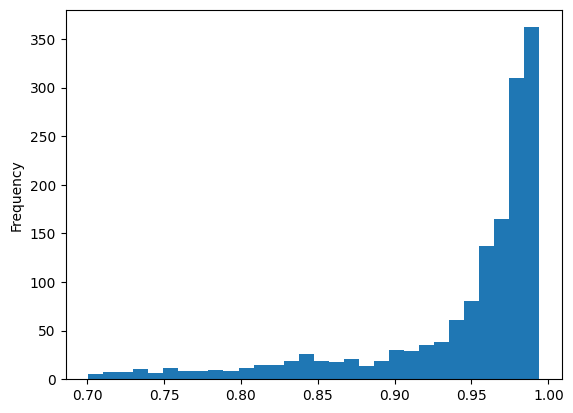

In [6]:
plasmid=pd.read_table('./../Data/Plasmid_all_actino.tsv',sep='\t')
plasmid.plasmid_score.plot.hist(bins=30)
plasmid=plasmid.loc[plasmid.plasmid_score>0.9]

In [7]:
cluster['Nuccore']=cluster.Accession_DB.map(lambda x: "_".join(x.split('_')[2:-1]))
cluster['In_plasmid']=0
cluster.loc[cluster.Nuccore.isin(plasmid.seq_name),'In_plasmid']=1

/tmp/ipykernel_323/245966735.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prophage['Start']=prophage.coordinates.map(lambda x: int(str(x).split('-')[0]))
/tmp/ipykernel_323/245966735.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prophage['End']=prophage.coordinates.map(lambda x: int(str(x).split('-')[1]))
/tmp/ipykernel_323/245966735.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

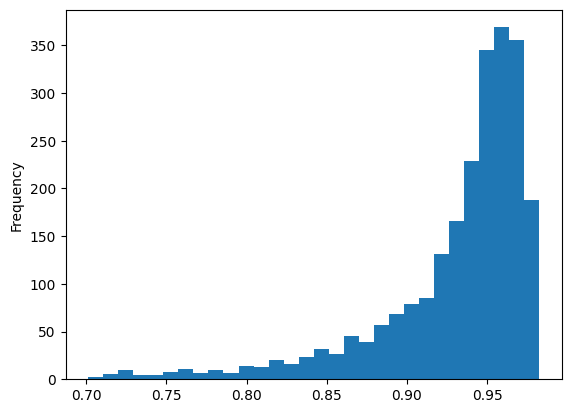

In [8]:
prophage=pd.read_table('./../Data/Prophage_all_actino.tsv',sep='\t')
prophage.virus_score.plot.hist(bins=30)
prophage=prophage.loc[prophage.virus_score>0.85]
prophage=prophage.loc[~prophage.coordinates.isna()]
prophage['Start']=prophage.coordinates.map(lambda x: int(str(x).split('-')[0]))
prophage['End']=prophage.coordinates.map(lambda x: int(str(x).split('-')[1]))
prophage['Nuccore']=prophage.seq_name.map(lambda x: x.split('|')[0])


In [9]:
cluster['Close_prophage']=0
for i in tqdm(cluster.index.to_list()):
    tmp_pro=prophage.loc[prophage.Nuccore==cluster.Nuccore[i]]
    start_synth=cluster['start'][i]
    end_synth=cluster['end'][i]
    if len(tmp_pro)>0:
        tmp_pro=tmp_pro.loc[((tmp_pro.Start<=start_synth-10000)&(tmp_pro.End>=start_synth-10000))|((tmp_pro.Start<=end_synth+10000)&(tmp_pro.End>=end_synth+10000))]
        if len(tmp_pro)>0:
            cluster.loc[i,'Close_prophage']=1
            tmp_pro=tmp_pro.loc[((tmp_pro.Start-10)<start_synth)&((tmp_pro.End+10)>end_synth)]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 13701/13701 [00:22<00:00, 606.26it/s]


In [10]:
cluster.Close_prophage.value_counts()

Close_prophage
0    13597
1      104
Name: count, dtype: int64

In [11]:
Conservon_sys=pd.read_table('./../Data/Conservon_sys.tsv',sep='\t')

for i in tqdm(cluster.index.to_list()):
    Close_conservon=0
    Close_conservon_id=''
    Start=cluster['start'].to_list()[i]
    End=cluster['end'].to_list()[i]
    Nuccore=cluster.Nuccore.to_list()[i]
    tmp_conservon=Conservon_sys.loc[Conservon_sys.Nuccore==Nuccore]
    if len(tmp_conservon)>0:
        tmp_conservon=tmp_conservon.loc[(tmp_conservon.Start.between(Start-10000,End+10000))|(tmp_conservon.End.between(Start-10000,End+10000))]
        Close_conservon+=len(tmp_conservon)
    cluster.loc[i,'Close_conservon']=Close_conservon

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 13701/13701 [03:17<00:00, 69.39it/s]


# Statistics Defense

% of proximity to a defense systems (average by cluster) by class of lanthipeptide

Type
lanthipeptide-class-i      17.661804
lanthipeptide-class-ii      4.326654
lanthipeptide-class-iii     4.543315
lanthipeptide-class-iv      4.428786
lanthipeptide-class-v       5.000149
Name: Sys_close, dtype: float64

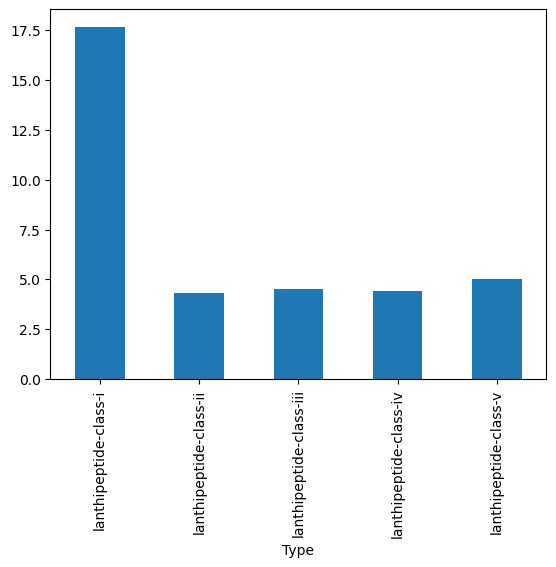

In [12]:
(cluster.groupby(['Type','Cluster']).Sys_close.mean().reset_index().groupby('Type').Sys_close.mean()*100).plot.bar()

cluster.groupby(['Type','Cluster']).Sys_close.mean().reset_index().groupby('Type').Sys_close.mean()*100

By adding the difference between lanthiphage and the non defensive lanthipeptide class-I

Type_defensive
Lanthiphage                26.595715
lanthipeptide-class-i       7.724156
lanthipeptide-class-ii      4.326654
lanthipeptide-class-iii     4.543315
lanthipeptide-class-iv      4.428786
lanthipeptide-class-v       5.000149
Name: Sys_close, dtype: float64

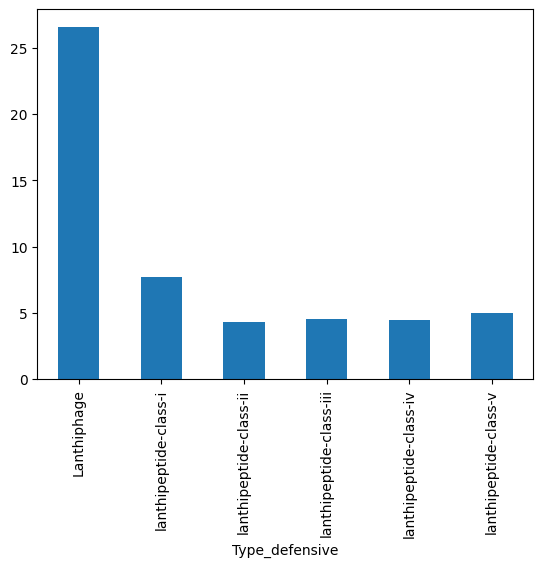

In [13]:
(cluster.groupby(['Type_defensive','Cluster']).Sys_close.mean().reset_index().groupby('Type_defensive').Sys_close.mean()*100).plot.bar()

cluster.groupby(['Type_defensive','Cluster']).Sys_close.mean().reset_index().groupby('Type_defensive').Sys_close.mean()*100

By looking at the different types of lanthiphage

New_clade
Clade 1                    26.391622
Clade 10                   26.686106
Clade 2                    32.537982
Clade 3                    18.601190
Clade 4                    25.980617
Clade 5                    27.681277
Clade 6                    25.803922
Clade 7                    29.775528
Clade 8                    21.927438
Clade 9                    23.002451
Limit                      20.000000
Non Defensive               7.710214
Other                      26.705882
lanthipeptide-class-ii      4.326654
lanthipeptide-class-iii     4.543315
lanthipeptide-class-iv      4.428786
lanthipeptide-class-v       5.000149
Name: Sys_close, dtype: float64

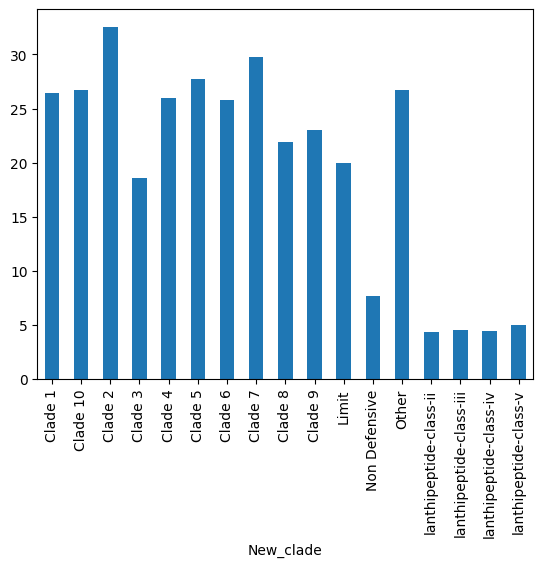

In [14]:
(cluster.groupby(['New_clade','Cluster']).Sys_close.mean().reset_index().groupby('New_clade').Sys_close.mean()*100).plot.bar()
cluster.groupby(['New_clade','Cluster']).Sys_close.mean().reset_index().groupby('New_clade').Sys_close.mean()*100

## Statistitcs Plasmid/MGE

First Plasmids distribution by class/lanthiphage and Clades of lanthiphage.

<Axes: xlabel='New_clade'>

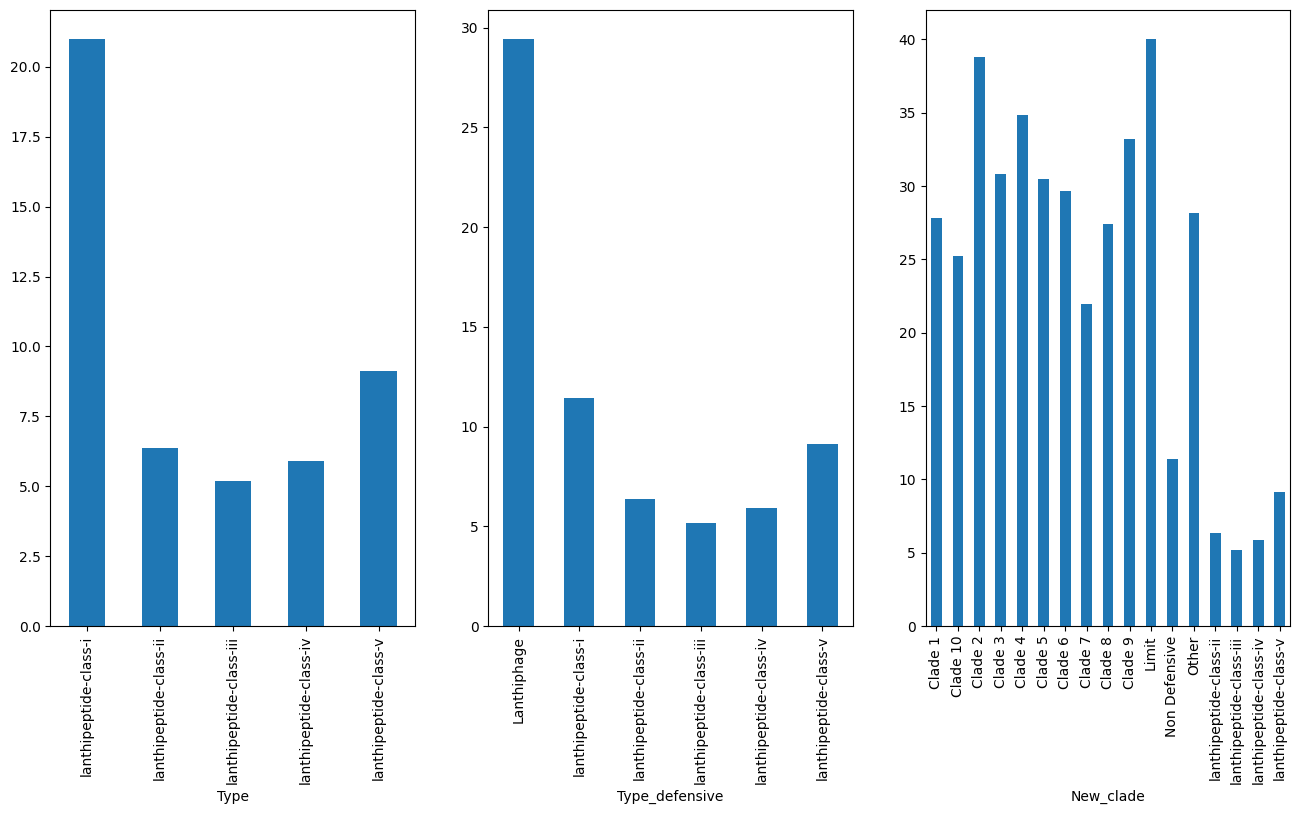

In [15]:
fig,ax=plt.subplots(1,3,figsize=(16,8))
(cluster.groupby(['Type','Cluster']).In_plasmid.mean().reset_index().groupby('Type').In_plasmid.mean()*100).plot.bar(ax=ax[0])
(cluster.groupby(['Type_defensive','Cluster']).In_plasmid.mean().reset_index().groupby('Type_defensive').In_plasmid.mean()*100).plot.bar(ax=ax[1])
(cluster.groupby(['New_clade','Cluster']).In_plasmid.mean().reset_index().groupby('New_clade').In_plasmid.mean()*100).plot.bar(ax=ax[2])


For the proximity/presence inside a prophage

<Axes: xlabel='New_clade'>

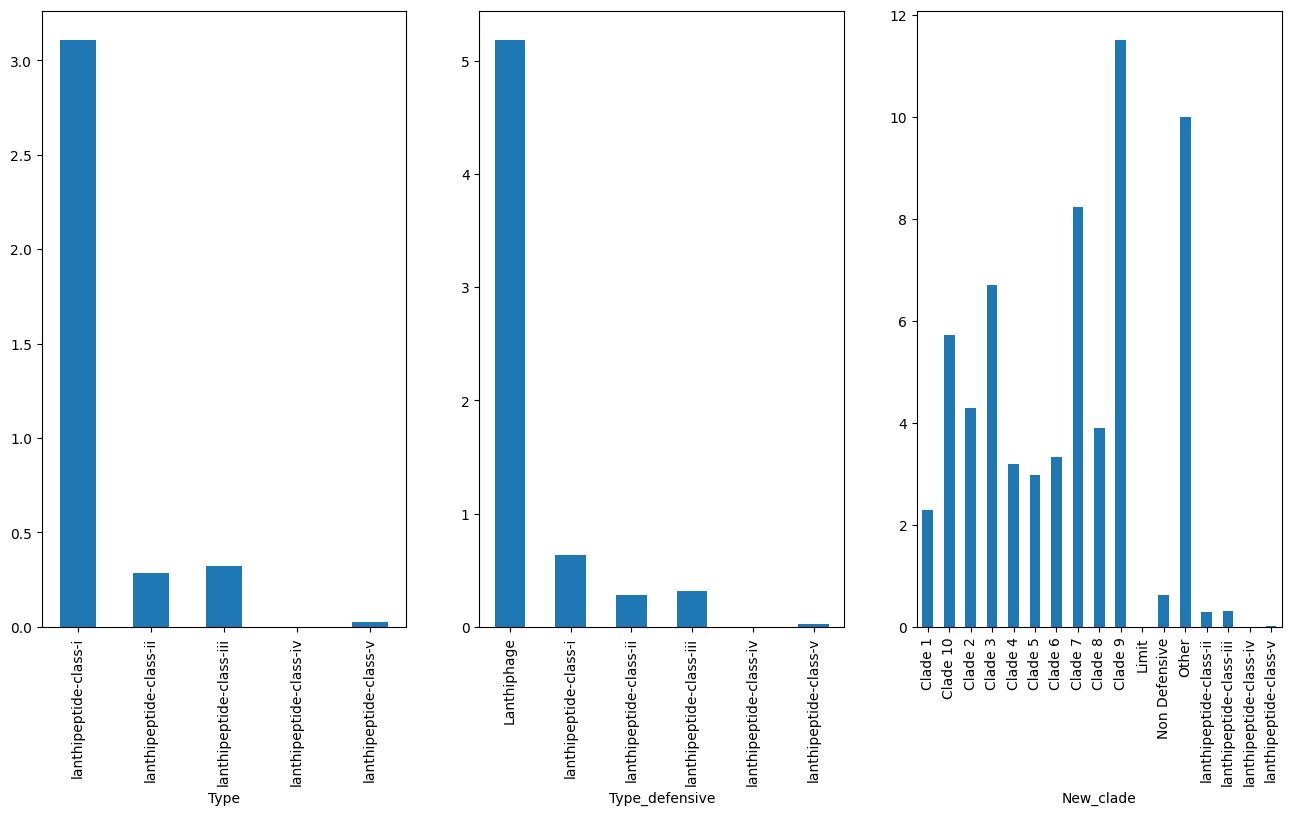

In [16]:
fig,ax=plt.subplots(1,3,figsize=(16,8))
(cluster.groupby(['Type','Cluster']).Close_prophage.mean().reset_index().groupby('Type').Close_prophage.mean()*100).plot.bar(ax=ax[0])
(cluster.groupby(['Type_defensive','Cluster']).Close_prophage.mean().reset_index().groupby('Type_defensive').Close_prophage.mean()*100).plot.bar(ax=ax[1])
(cluster.groupby(['New_clade','Cluster']).Close_prophage.mean().reset_index().groupby('New_clade').Close_prophage.mean()*100).plot.bar(ax=ax[2])


## Statistic conservon

<Axes: xlabel='New_clade'>

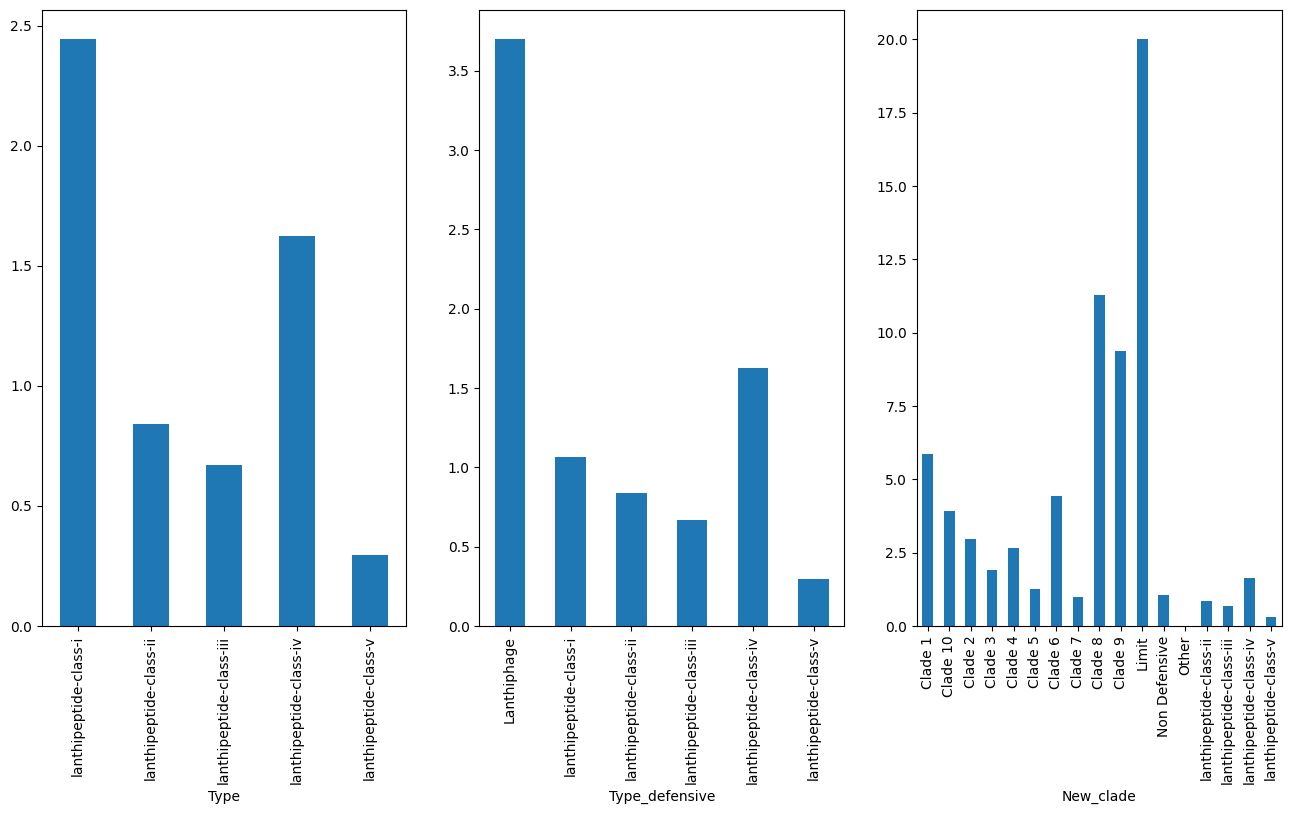

In [17]:
fig,ax=plt.subplots(1,3,figsize=(16,8))
(cluster.groupby(['Type','Cluster']).Close_conservon.mean().reset_index().groupby('Type').Close_conservon.mean()*100).plot.bar(ax=ax[0])
(cluster.groupby(['Type_defensive','Cluster']).Close_conservon.mean().reset_index().groupby('Type_defensive').Close_conservon.mean()*100).plot.bar(ax=ax[1])
(cluster.groupby(['New_clade','Cluster']).Close_conservon.mean().reset_index().groupby('New_clade').Close_conservon.mean()*100).plot.bar(ax=ax[2])


In [21]:
cluster.to_csv('./../Data/Results_01_Defense_and_MGE.tsv',sep='\t',index=False)

In [20]:
cluster

,Accession_DB,Localisation,start,end,Nuccore,Close_prophage,Cluster,Type,sys_id,Position,...,Assembly,New_clade,Type_defensive,Done_sys,Sys_close,Nb_sys_close,Close_type,Close_sys_id,In_plasmid,Close_conservon
0,GCF_000381025.1_NZ_KB905816.1_05659,540146:541352,540146,541352,NZ_KB905816.1,0,GCF_000381025.1_NZ_KB905816.1_05659,lanthipeptide-class-i,GCF_000381025.1_NZ_KB905816.1.region002_lanthi...,5659,...,GCF_000381025.1,Clade 1,Lanthiphage,0,0.0,NaN,NaN,NaN,0,0.0
1,GCF_000381025.1_NZ_KB905816.1_05680,563090:564350,563090,564350,NZ_KB905816.1,0,GCF_000381025.1_NZ_KB905816.1_05680,lanthipeptide-class-i,GCF_000381025.1_NZ_KB905816.1.region002_lanthi...,5680,...,GCF_000381025.1,Non Defensive,lanthipeptide-class-i,0,0.0,NaN,NaN,NaN,0,0.0
2,GCF_000715845.1_NZ_JNYL01000459.1_00039,5426:6662,5426,6662,NZ_JNYL01000459.1,0,GCF_000719735.1_NZ_JOHQ01000027.1_06446,lanthipeptide-class-i,GCF_000715845.1_NZ_JNYL01000459.1.region001_la...,39,...,GCF_000715845.1,Clade 5,Lanthiphage,0,0.0,NaN,NaN,NaN,1,0.0
3,GCF_000715845.1_NZ_JNYL01000459.1_00042,9283:10615,9283,10615,NZ_JNYL01000459.1,0,GCF_000715845.1_NZ_JNYL01000459.1_00042,lanthipeptide-class-i,GCF_000715845.1_NZ_JNYL01000459.1.region001_la...,42,...,GCF_000715845.1,Non Defensive,lanthipeptide-class-i,0,0.0,NaN,NaN,NaN,1,0.0
4,GCF_000715845.1_NZ_KL571088.1_02485,31325:32552,31325,32552,NZ_KL571088.1,0,GCF_022271435.1_NZ_JAFIQY010000004.1_00475,lanthipeptide-class-i,GCF_000715845.1_NZ_KL571088.1.region001_lanthi...,2485,...,GCF_000715845.1,Clade 1,Lanthiphage,0,0.0,NaN,NaN,NaN,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13696,GCF_963554475.1_NZ_CAUVSC010000001.1_01721,177125:179726,177125,179726,NZ_CAUVSC010000001.1,0,GCF_000175375.1_NZ_ACSH02000004.1_00856,lanthipeptide-class-ii,GCF_963554475.1_NZ_CAUVSC010000001.1.region001...,1721,...,GCF_963554475.1,lanthipeptide-class-ii,lanthipeptide-class-ii,0,1.0,1.0,RM_Type_I,GCF_963554475.1_RM_Type_I_6,0,0.0
13697,GCF_963555005.1_NZ_CAUVUD010000040.1_00502,1085:4127,1085,4127,NZ_CAUVUD010000040.1,0,GCF_916720605.1_NZ_CAKARO010000021.1_01493,lanthipeptide-class-ii,GCF_963555005.1_NZ_CAUVUD010000040.1.region001...,502,...,GCF_963555005.1,lanthipeptide-class-ii,lanthipeptide-class-ii,0,0.0,NaN,NaN,NaN,0,0.0
13698,GCF_963555125.1_NZ_CAUVUG010000001.1_01372,162204:165264,162204,165264,NZ_CAUVUG010000001.1,0,GCF_000763765.1_NZ_JPVS01000009.1_01025,lanthipeptide-class-ii,GCF_963555125.1_NZ_CAUVUG010000001.1.region001...,1372,...,GCF_963555125.1,lanthipeptide-class-ii,lanthipeptide-class-ii,0,0.0,NaN,NaN,NaN,0,0.0
13699,GCF_963555125.1_NZ_CAUVUG010000001.1_01374,166189:169198,166189,169198,NZ_CAUVUG010000001.1,0,GCF_000763765.1_NZ_JPVS01000009.1_01023,lanthipeptide-class-ii,GCF_963555125.1_NZ_CAUVUG010000001.1.region001...,1374,...,GCF_963555125.1,lanthipeptide-class-ii,lanthipeptide-class-ii,0,0.0,NaN,NaN,NaN,0,0.0
